In [1]:
# Lan Le - UB Person Number: 50322056
# CSE555 Problem Set 4: Neural Networks




import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import regularizers
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import LambdaCallback
from keras.preprocessing.image import ImageDataGenerator






def load_mnist(path, kind='train'):

    #Load MNIST data from path
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)

    return images, labels


def get_1k_images(images, labels):
    X_1k = np.zeros((1000, 28, 28))
    y_1k = np.zeros((1000))
    
    # add 100 images per digit to the data set
    for i in range(10):
        current_X = images[labels == i]
        current_y = labels[labels == i]
        X_1k[100*i : 100*(i+1)-1] = current_X[0:99]
        y_1k[100*i : 100*(i+1)-1] = current_y[0:99]
    
    # shuffle the images
    p = np.random.permutation(1000)
    
    return X_1k[p], y_1k[p]

    
# get error from training and testing (i.e. 1-accuracy)
def get_error(acc):
    return [1-x for x in acc]


# save weights from model
weights = []
def save_w(model):
    for layer in model.layers:
        weights.append(layer.get_weights())
        

# calculate sum of layer weights
def get_weight_sum(weight):
    sum = 0
    for w in weight:
        sum = sum + np.sum(w)
    return sum


# calculate the learning speed of hidden layers
def find_learn_speed(weights, numLayer):
    speeds = []
    
    for i in range(1, numLayer+1):
        w = []
        while i < len(weights):
            wSum = get_weight_sum(weights[i])
            w.append(wSum)
            i = i + numLayer + 2

        speed = []
        for x in range(len(w)-1):
            speed.append(abs((w[x+1] - w[x])/w[x]))
        
        speeds.append(speed)
    
    return speeds
        





# read Digit MNIST dataset
base_dir = os.path.dirname('__file__')
digit_file_path = os.path.join(base_dir, 'data')

X_train, y_train = load_mnist(digit_file_path, kind='train')
X_test, y_test = load_mnist(digit_file_path, kind='t10k')

# scale input data
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

# extract 1000 images from training and test images
X_train_1k, y_train_1k = get_1k_images(X_train, y_train)
X_test_1k, y_test_1k = get_1k_images(X_test, y_test)

# initialize neural network optimizer
adam = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, amsgrad=False)


Using TensorFlow backend.


In order to maximize the log likelihood of label, we minimizes the criterion function of the negative log probability of training data set $J_0(\omega) = -log\;p(D;\omega)$. In this case, the negative log probability can also be written as $-log\;p(\{(x_n,t_n):n=1,2,...\};\omega)$. <br>
Since $-log\;p(D;\omega) = - {\sum_{n} log\;p(t_n|x_n;\omega)}$ for the general case we have the following:
\begin{align*}
    J_0(\omega) &= -log\;p(\{(x_n,t_n):n=1,2,...\};\omega) \\
                &= -{\sum_{n} \sum_{m=0}^{9} log\;p(t_n=m|x_n;\omega)} \\
                &= -log {\prod_{n} \prod_{m=0}^{9} p(t_n=m|x_n;\omega)}
\end{align*}
<br>
So as to maximize the a posterior likelihood of observing the training data, we aim to maximize the posterier distribution, $p(\omega|D)$. This is equivalent to minimizing $-log\;p(\omega|D)$. On the other hand, based on Bayesian theorem, this is also equivalent to minimizing $J(\omega) = -log\;p(D;\omega) - log\;p(\omega)$. Therefore, we have the criterion function with L2 regularization in the following form:
\begin{align*}
    J(\omega) &= -log\;p(D;\omega) - log\;p(\omega)\\
              &= J_0(\omega) - log\;p(\omega;{\alpha}^{-1})
\end{align*}

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 427us/step - loss: 1.6903 - accuracy: 0.4330 - val_loss: 1.3388 - val_accuracy: 0.5570
Epoch 2/30
1000/1000 [==============================] - 0s 291us/step - loss: 1.0827 - accuracy: 0.6530 - val_loss: 1.3554 - val_accuracy: 0.5430
Epoch 3/30
1000/1000 [==============================] - 0s 307us/step - loss: 0.9179 - accuracy: 0.7090 - val_loss: 1.1126 - val_accuracy: 0.6630
Epoch 4/30
1000/1000 [==============================] - 0s 289us/step - loss: 0.8100 - accuracy: 0.7490 - val_loss: 1.0559 - val_accuracy: 0.6660
Epoch 5/30
1000/1000 [==============================] - 0s 321us/step - loss: 0.7134 - accuracy: 0.7810 - val_loss: 0.8880 - val_accuracy: 0.7630
Epoch 6/30
1000/1000 [==============================] - 0s 282us/step - loss: 0.7795 - accuracy: 0.7610 - val_loss: 1.0834 - val_accuracy: 0.6800
Epoch 7/30
1000/1000 [==============================] - 0s 298us/step - loss

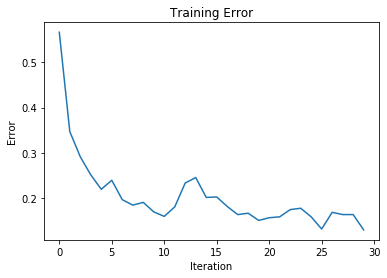

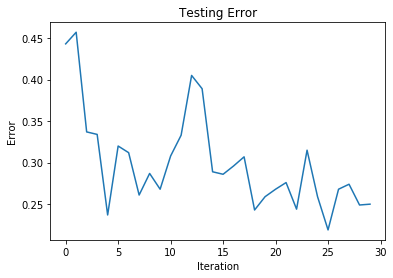

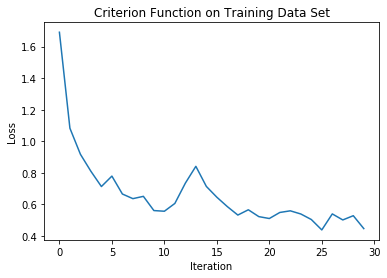

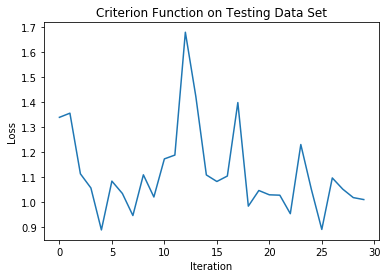

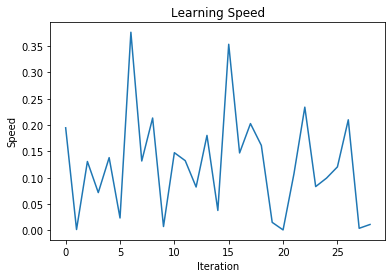

In [2]:
"""
Build a neural network with 1 hidden layer of 30 sigmoid nodes, 
and an output layer of 10 softmax nodes 
from 1000 training images (100 images per digit). 
Train the network for 30 complete epochs, 
using mini-batches of 10 training examples at a time, 
a learning rate η=0.1
"""

# build the model
model_2a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# initialize callback
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2a))

model_2a.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2a = model_2a.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2a.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2a.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2a.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2a.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speed = find_learn_speed(weights, 1)[0]
plt.plot(speed)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.show()


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 472us/step - loss: 2.8214 - accuracy: 0.0890 - val_loss: 2.4292 - val_accuracy: 0.0990
Epoch 2/30
1000/1000 [==============================] - 0s 344us/step - loss: 2.5138 - accuracy: 0.0850 - val_loss: 2.4799 - val_accuracy: 0.0990
Epoch 3/30
1000/1000 [==============================] - 0s 310us/step - loss: 2.4728 - accuracy: 0.1000 - val_loss: 2.4108 - val_accuracy: 0.0990
Epoch 4/30
1000/1000 [==============================] - 0s 332us/step - loss: 2.4088 - accuracy: 0.0900 - val_loss: 2.3867 - val_accuracy: 0.1090
Epoch 5/30
1000/1000 [==============================] - 0s 394us/step - loss: 2.4097 - accuracy: 0.0890 - val_loss: 2.3415 - val_accuracy: 0.0990
Epoch 6/30
1000/1000 [==============================] - 0s 390us/step - loss: 2.3888 - accuracy: 0.1050 - val_loss: 2.3975 - val_accuracy: 0.1090
Epoch 7/30
1000/1000 [==============================] - 0s 364us/step - loss

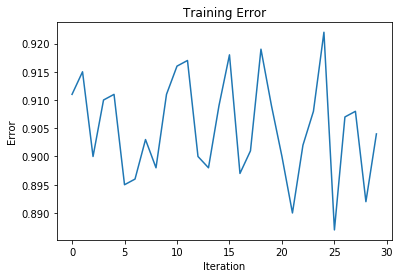

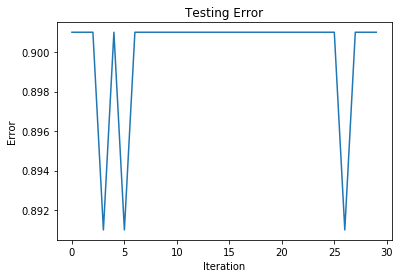

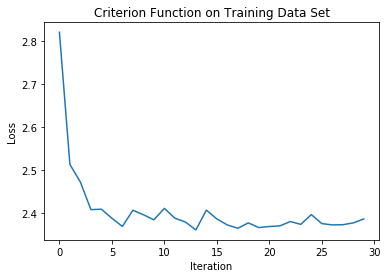

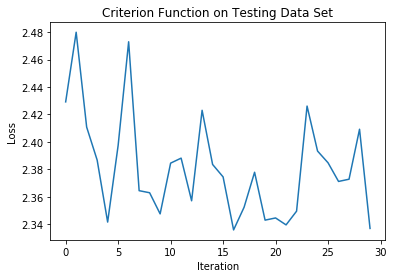

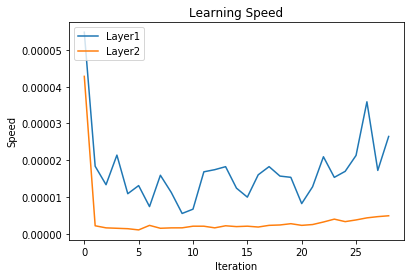

In [3]:
"""
Build a neural network with 2 hidden layers of 30 sigmoid nodes each 
and without L2 regularization
"""

# build the model
model_2b1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid'),
    Dense(30, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# initialize callback
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2b1))

model_2b1.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2b1 = model_2b1.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2b1.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2b1.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2b1.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2b1.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speeds = find_learn_speed(weights, 2)
speed1 = speeds[0]
speed2 = speeds[1]
plt.plot(speed1)
plt.plot(speed2)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.legend(['Layer1', 'Layer2'], loc='upper left')
plt.show()

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 525us/step - loss: 2.9123 - accuracy: 0.1080 - val_loss: 2.6281 - val_accuracy: 0.0990
Epoch 2/30
1000/1000 [==============================] - 0s 341us/step - loss: 2.5810 - accuracy: 0.1090 - val_loss: 2.5933 - val_accuracy: 0.0990
Epoch 3/30
1000/1000 [==============================] - 0s 349us/step - loss: 2.5657 - accuracy: 0.0950 - val_loss: 2.4780 - val_accuracy: 0.0990
Epoch 4/30
1000/1000 [==============================] - 1s 514us/step - loss: 2.5431 - accuracy: 0.1100 - val_loss: 2.5167 - val_accuracy: 0.0990
Epoch 5/30
1000/1000 [==============================] - 0s 419us/step - loss: 2.5045 - accuracy: 0.1010 - val_loss: 2.5433 - val_accuracy: 0.0990
Epoch 6/30
1000/1000 [==============================] - 0s 342us/step - loss: 2.5657 - accuracy: 0.0960 - val_loss: 2.3826 - val_accuracy: 0.0990
Epoch 7/30
1000/1000 [==============================] - 0s 350us/step - loss

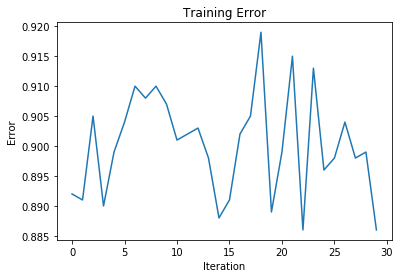

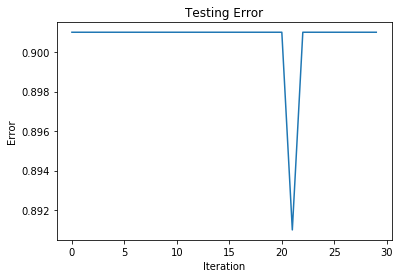

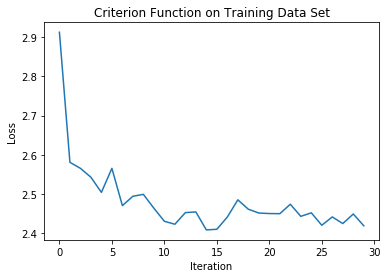

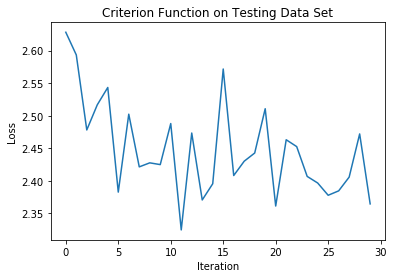

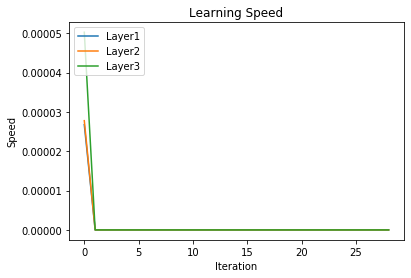

In [4]:
"""
Build a neural network with 3 hidden layers of 30 sigmoid nodes each 
and without L2 regularization
"""

# build the model
model_2b2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid'),
    Dense(30, activation='sigmoid'),
    Dense(30, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# initialize callback
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2b2))

model_2b2.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2b2 = model_2b2.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2b2.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2b2.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2b2.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2b2.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speeds = find_learn_speed(weights, 3)
speed1 = speeds[0]
speed2 = speeds[1]
speed3 = speeds[2]
plt.plot(speed1)
plt.plot(speed2)
plt.plot(speed3)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.legend(['Layer1', 'Layer2', 'Layer3'], loc='upper left')
plt.show()

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 434us/step - loss: 487.2892 - accuracy: 0.1200 - val_loss: 4.4365 - val_accuracy: 0.1190
Epoch 2/30
1000/1000 [==============================] - 0s 297us/step - loss: 4.4852 - accuracy: 0.1200 - val_loss: 3.6878 - val_accuracy: 0.1710
Epoch 3/30
1000/1000 [==============================] - 0s 360us/step - loss: 3.8373 - accuracy: 0.1260 - val_loss: 3.3964 - val_accuracy: 0.1050
Epoch 4/30
1000/1000 [==============================] - 0s 331us/step - loss: 3.7045 - accuracy: 0.1260 - val_loss: 3.2063 - val_accuracy: 0.1050
Epoch 5/30
1000/1000 [==============================] - 0s 367us/step - loss: 3.6015 - accuracy: 0.1250 - val_loss: 3.3735 - val_accuracy: 0.0990
Epoch 6/30
1000/1000 [==============================] - 0s 352us/step - loss: 3.2104 - accuracy: 0.0960 - val_loss: 3.0755 - val_accuracy: 0.0990
Epoch 7/30
1000/1000 [==============================] - 0s 319us/step - lo

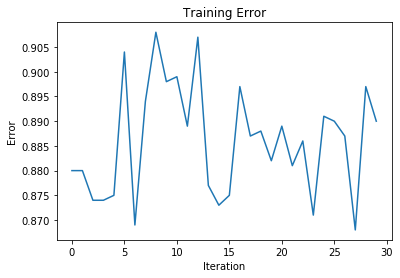

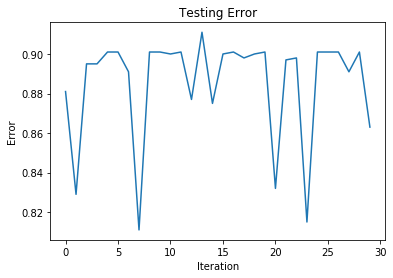

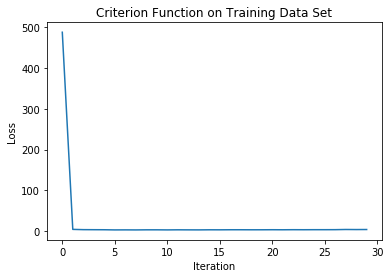

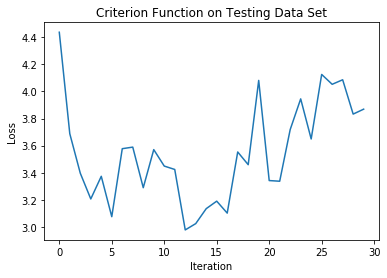

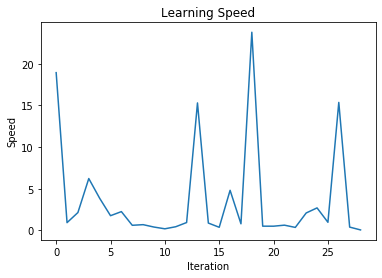

In [5]:
"""
Build a neural network with 1 hidden layer of 30 sigmoid nodes 
and with L2 regularization
"""

# build the model
model_2b3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(10, activation='softmax')
])

# initialize callback
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2b3))

model_2b3.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2b3 = model_2b3.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2b3.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2b3.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2b3.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2b3.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speed = find_learn_speed(weights, 1)[0]
plt.plot(speed)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.show()

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 511us/step - loss: 502.3750 - accuracy: 0.0920 - val_loss: 3.4885 - val_accuracy: 0.0990
Epoch 2/30
1000/1000 [==============================] - 0s 349us/step - loss: 3.2380 - accuracy: 0.0970 - val_loss: 3.5174 - val_accuracy: 0.0990
Epoch 3/30
1000/1000 [==============================] - 0s 318us/step - loss: 3.1329 - accuracy: 0.1020 - val_loss: 2.6122 - val_accuracy: 0.0990
Epoch 4/30
1000/1000 [==============================] - 0s 455us/step - loss: 2.9985 - accuracy: 0.0870 - val_loss: 2.9508 - val_accuracy: 0.0990
Epoch 5/30
1000/1000 [==============================] - 0s 345us/step - loss: 2.9230 - accuracy: 0.1290 - val_loss: 2.8253 - val_accuracy: 0.0990
Epoch 6/30
1000/1000 [==============================] - 0s 349us/step - loss: 2.8913 - accuracy: 0.0890 - val_loss: 2.9314 - val_accuracy: 0.0990
Epoch 7/30
1000/1000 [==============================] - 0s 320us/step - lo

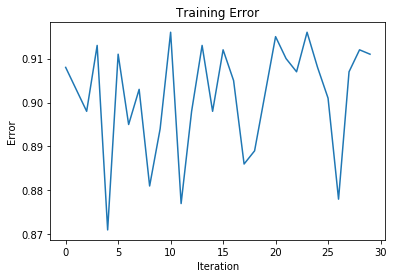

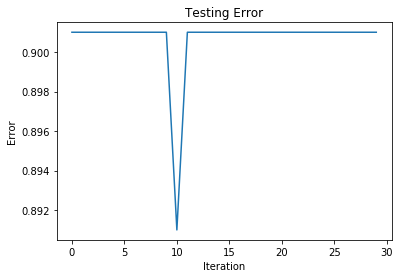

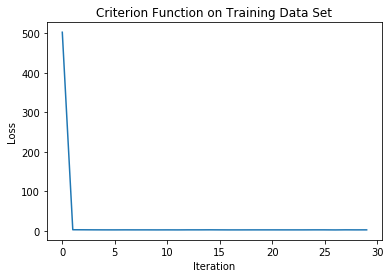

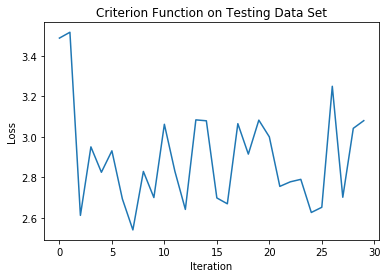

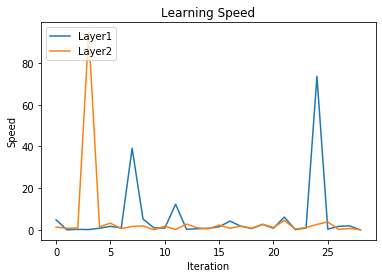

In [6]:
"""
Build a neural network with 2 hidden layers of 30 sigmoid nodes each 
and with L2 regularization
"""

# build the model
model_2b4 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(10, activation='softmax')
])

# initialize callback
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2b4))

model_2b4.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2b4 = model_2b4.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2b4.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2b4.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2b4.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2b4.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speeds = find_learn_speed(weights, 2)
speed1 = speeds[0]
speed2 = speeds[1]
plt.plot(speed1)
plt.plot(speed2)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.legend(['Layer1', 'Layer2'], loc='upper left')
plt.show()

Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 592us/step - loss: 519.1749 - accuracy: 0.0920 - val_loss: 3.4211 - val_accuracy: 0.1090
Epoch 2/30
1000/1000 [==============================] - 0s 383us/step - loss: 3.0395 - accuracy: 0.1010 - val_loss: 2.9627 - val_accuracy: 0.0990
Epoch 3/30
1000/1000 [==============================] - 0s 413us/step - loss: 2.9719 - accuracy: 0.1140 - val_loss: 2.9638 - val_accuracy: 0.0990
Epoch 4/30
1000/1000 [==============================] - 0s 413us/step - loss: 3.0733 - accuracy: 0.0970 - val_loss: 3.0997 - val_accuracy: 0.0990
Epoch 5/30
1000/1000 [==============================] - 0s 350us/step - loss: 2.9274 - accuracy: 0.1090 - val_loss: 2.9857 - val_accuracy: 0.0990
Epoch 6/30
1000/1000 [==============================] - 0s 394us/step - loss: 2.9294 - accuracy: 0.0850 - val_loss: 2.6914 - val_accuracy: 0.0990
Epoch 7/30
1000/1000 [==============================] - 0s 325us/step - lo

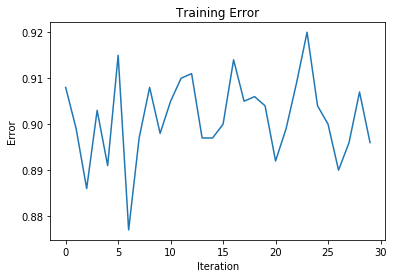

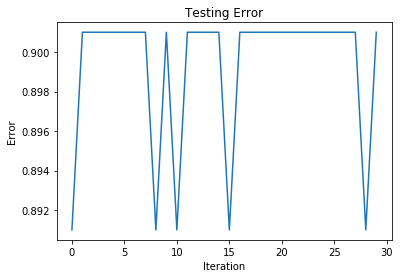

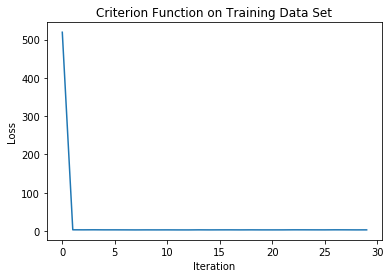

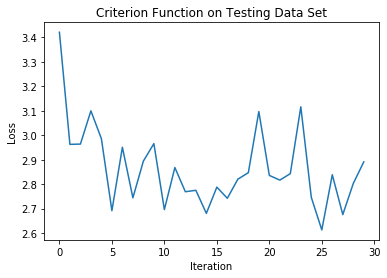

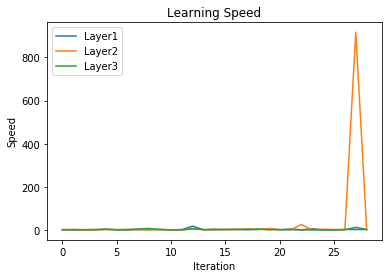

In [7]:
"""
Build a neural network with 3 hidden layers of 30 sigmoid nodes each 
and with L2 regularization
"""

# build the model
model_2b5 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(30, activation='sigmoid', 
          kernel_regularizer=regularizers.l2(5),
          bias_regularizer=regularizers.l2(5)),
    Dense(10, activation='softmax')
])

# initialize callback
weights = []
save_weights = LambdaCallback(on_epoch_end=lambda batch, logs: save_w(model_2b5))

model_2b5.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
history_2b5 = model_2b5.fit(
    X_train_1k,
    to_categorical(y_train_1k),
    epochs=30,
    batch_size=10,
    validation_data=(X_test_1k, to_categorical(y_test_1k)),
    callbacks=[save_weights]
)

# plot training error
plt.plot(get_error(history_2b5.history['accuracy']))
plt.title('Training Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot testing error
plt.plot(get_error(history_2b5.history['val_accuracy']))
plt.title('Testing Error')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on training data set
plt.plot(history_2b5.history['loss'])
plt.title('Criterion Function on Training Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot criterion function on testing data set
plt.plot(history_2b5.history['val_loss'])
plt.title('Criterion Function on Testing Data Set')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

# plot learning speed
speeds = find_learn_speed(weights, 3)
speed1 = speeds[0]
speed2 = speeds[1]
speed3 = speeds[2]
plt.plot(speed1)
plt.plot(speed2)
plt.plot(speed3)
plt.title('Learning Speed')
plt.ylabel('Speed')
plt.xlabel('Iteration')
plt.legend(['Layer1', 'Layer2', 'Layer3'], loc='upper left')
plt.show()

In [10]:
"""
Construct and train convolutional neural network for MNIST classification. 
Regularize the training of the neural network through dropout. 
Regularize the training of neural network through augment your selection of 1000 images 
by rotating them for 1-3 degrees clockwise and counter clockwise, 
and shifting them for 3 pixels in 8 different directions.
"""

# create image generator to augment data
img_gen = ImageDataGenerator(
    rotation_range=3,
    width_shift_range=3,
    height_shift_range=3)

# reshape data
cnn_X_train = np.expand_dims(X_train_1k, axis=3)
cnn_X_test = np.expand_dims(X_test_1k, axis=3)

# augment images
img_gen.fit(cnn_X_train)

# build the model
num_filters = 8
filter_size = 3
pool_size = 2

cnn_model = Sequential([
    Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
cnn_history = cnn_model.fit_generator(
    img_gen.flow(cnn_X_train, to_categorical(y_train_1k), batch_size=10),
    steps_per_epoch=len(cnn_X_train) / 10,
    epochs=30,
    validation_data=(cnn_X_test, to_categorical(y_test_1k))
)


Epoch 1/30
100/100 [==============================] - 1s 9ms/step - loss: 1.8090 - accuracy: 0.4330 - val_loss: 1.1441 - val_accuracy: 0.6960
Epoch 2/30
100/100 [==============================] - 1s 8ms/step - loss: 1.1386 - accuracy: 0.6400 - val_loss: 0.8398 - val_accuracy: 0.7330
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.9993 - accuracy: 0.6810 - val_loss: 0.7700 - val_accuracy: 0.7570
Epoch 4/30
100/100 [==============================] - 1s 8ms/step - loss: 0.9602 - accuracy: 0.6980 - val_loss: 0.7189 - val_accuracy: 0.7740
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.9264 - accuracy: 0.7200 - val_loss: 0.6562 - val_accuracy: 0.8000
Epoch 6/30
100/100 [==============================] - 1s 8ms/step - loss: 0.8274 - accuracy: 0.7360 - val_loss: 0.6458 - val_accuracy: 0.8010
Epoch 7/30
100/100 [==============================] - 1s 8ms/step - loss: 0.8260 - accuracy: 0.7440 - val_loss: 0.6181 - val_accuracy: 0.7960
Epoch 